# Anomalous SST Trend 

## $$Historical - \overline{PIC}  = Anomaly$$

### `pip install dask --force-reinstall` in terminal to fix error when opening ds
`Python Xarray ValueError: unrecognized chunk manager dask - must be one of: []`

In [1]:
import xarray as xr 
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
historical = xr.open_mfdataset('/work/Shanice.Bailey/ESM4/historical_1850-2014/ocean_*.nc', decode_times=False)

In [3]:
pic = xr.open_mfdataset('/work/Shanice.Bailey/ESM4/PIC/ocean_*.tos.nc', decode_times=False)

In [4]:
historical

<xarray.Dataset> Size: 100GB
Dimensions:     (time: 60225, nv: 2, yh: 576, xh: 720)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) float64 482kB 0.5 1.5 2.5 ... 6.022e+04 6.022e+04
  * xh          (xh) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh          (yh) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
Data variables:
    average_DT  (time) float64 482kB dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T1  (time) float64 482kB dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T2  (time) float64 482kB dask.array<chunksize=(1825,), meta=np.ndarray>
    time_bnds   (time, nv) float64 964kB dask.array<chunksize=(1825, 2), meta=np.ndarray>
    tos         (time, yh, xh) float32 100GB dask.array<chunksize=(1825, 576, 720), meta=np.ndarray>
Attributes:
    filename:            ocean_daily_cmip.18500101-18541231.tos.nc
    title:               ESM4_esm-hist_D1
    associated_files:    areacello: 18500101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [5]:
pic

<xarray.Dataset> Size: 200GB
Dimensions:     (time: 120450, nv: 2, yh: 576, xh: 720)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) float64 964kB 0.5 1.5 2.5 ... 1.825e+05 1.825e+05
  * xh          (xh) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh          (yh) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
Data variables:
    average_DT  (time) float64 964kB dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T1  (time) float64 964kB dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T2  (time) float64 964kB dask.array<chunksize=(1825,), meta=np.ndarray>
    time_bnds   (time, nv) float64 2MB dask.array<chunksize=(1825, 2), meta=np.ndarray>
    tos         (time, yh, xh) float32 200GB dask.array<chunksize=(1825, 576, 720), meta=np.ndarray>
Attributes:
    filename:            ocean_daily_cmip.00010101-00051231.tos.nc
    title:               ESM4_esm-piControl_D
    associated_files:    areacello: 00010101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

Got this warning during PIC download 

In [61]:
import os

In [64]:
print(os.getenv('JUPYTERHUB_USER'))

None


In [66]:
#see what local dask is doing in the background 
from dask.distributed import LocalCluster, Client
import dask

with dask.config.set(**{"distributed.dashboard.link": "http://localhost:8888/lab/tree/work/Shanice.Bailey/MHW-gfdl/sst-trend-ESM4.ipynb"}):
    cluster = LocalCluster()
    client = Client(cluster)

/home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36161 instead
  warnings.warn(
Task exception was never retrieved
future: <Task finished name='Task-2216073' coro=<Client._gather.<locals>.wait() done, defined at /home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-2228251' coro=<Client._gather.<locals>.wait() done, defined at /home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/home/Shanice.Bailey/.local/lib/python3.11/site-packages/dis

In [67]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:36161/status,
Dashboard: http://127.0.0.1:36161/status,Workers: 4
Total threads: 16,Total memory: 502.62 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33857,Workers: 4
Dashboard: http://127.0.0.1:36161/status,Total threads: 16
Started: Just now,Total memory: 502.62 GiB
Comm: tcp://127.0.0.1:36245,Total threads: 4
Dashboard: http://127.0.0.1:37277/status,Memory: 125.66 GiB
Nanny: tcp://127.0.0.1:36255,


In [103]:
gom = dict(xh=slice(-100,-80), yh=slice(21,31))
pic_gom1 = pic.tos.sel(**gom)

hist_gom = historical.tos.sel(**gom).assign_coords({'time':np.tile(np.arange(1,366), 165)})
pic_gom = pic_gom1.assign_coords({'time':np.tile(np.arange(1,366), 330)})

In [105]:
hist_gom

<xarray.DataArray 'tos' (time: 60225, yh: 23, xh: 40)> Size: 222MB
dask.array<getitem, shape=(60225, 23, 40), dtype=float32, chunksize=(1825, 23, 40), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 320B -99.75 -99.25 -98.75 ... -81.25 -80.75 -80.25
  * yh       (yh) float64 184B 21.1 21.53 21.96 22.4 ... 29.37 29.81 30.24 30.67
  * time     (time) int64 482kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [106]:
pic_gom

<xarray.DataArray 'tos' (time: 120450, yh: 23, xh: 40)> Size: 443MB
dask.array<getitem, shape=(120450, 23, 40), dtype=float32, chunksize=(1825, 23, 40), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 320B -99.75 -99.25 -98.75 ... -81.25 -80.75 -80.25
  * yh       (yh) float64 184B 21.1 21.53 21.96 22.4 ... 29.37 29.81 30.24 30.67
  * time     (time) int64 964kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

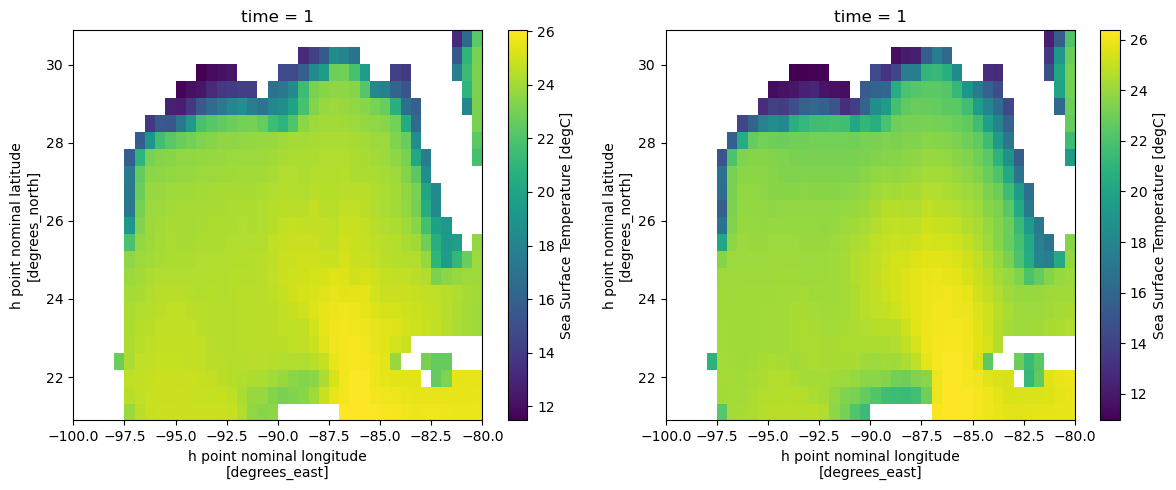

In [107]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))
pic_gom[0].plot(ax=ax0)
hist_gom[0].plot(ax=ax1)
plt.tight_layout();

In [108]:
#Compute daily climatology of sst's
pic_clim = pic_gom.groupby('time').mean('time')
hist_clim = hist_gom.groupby('time').mean('time')

In [110]:
hist_clim.load()

<xarray.DataArray 'tos' (time: 365, yh: 23, xh: 40)> Size: 1MB
array([[[       nan,        nan,        nan, ..., 26.07217  ,
         26.076874 , 26.081049 ],
        [       nan,        nan,        nan, ..., 25.97962  ,
         25.997532 , 26.017342 ],
        [       nan,        nan,        nan, ..., 25.91521  ,
         25.963852 , 25.979471 ],
        ...,
        [       nan,        nan,        nan, ..., 15.776686 ,
         20.551176 , 23.09118  ],
        [       nan,        nan,        nan, ..., 14.434033 ,
         19.662304 , 22.942173 ],
        [       nan,        nan,        nan, ..., 12.967495 ,
         15.969413 , 22.06993  ]],

       [[       nan,        nan,        nan, ..., 26.044266 ,
         26.05089  , 26.057241 ],
        [       nan,        nan,        nan, ..., 25.952095 ,
         25.969564 , 25.989677 ],
        [       nan,        nan,        nan, ..., 25.886393 ,
         25.935162 , 25.951334 ],
...
        [       nan,        nan,        nan, ..., 15.89706  ,
         20.657711 , 23.176292 ],
        [       nan,        nan,        nan, ..., 14.573134 ,
         19.771309 , 23.039705 ],
        [       nan,        nan,        nan, ..., 13.143252 ,
         16.070665 , 22.197433 ]],

       [[       nan,        nan,        nan, ..., 26.099035 ,
         26.103386 , 26.10915  ],
        [       nan,        nan,        nan, ..., 26.00633  ,
         26.023201 , 26.044004 ],
        [       nan,        nan,        nan, ..., 25.94491  ,
         25.994528 , 26.010693 ],
        ...,
        [       nan,        nan,        nan, ..., 15.889101 ,
         20.641945 , 23.151033 ],
        [       nan,        nan,        nan, ..., 14.549404 ,
         19.763428 , 23.008284 ],
        [       nan,        nan,        nan, ..., 13.091917 ,
         16.050518 , 22.156227 ]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 320B -99.75 -99.25 -98.75 ... -81.25 -80.75 -80.25
  * yh       (yh) float64 184B 21.1 21.53 21.96 22.4 ... 29.37 29.81 30.24 30.67
  * time     (time) int64 3kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [111]:
pic_clim.load()

<xarray.DataArray 'tos' (time: 365, yh: 23, xh: 40)> Size: 1MB
array([[[       nan,        nan,        nan, ..., 25.739817 ,
         25.744434 , 25.753057 ],
        [       nan,        nan,        nan, ..., 25.648613 ,
         25.66503  , 25.68664  ],
        [       nan,        nan,        nan, ..., 25.583452 ,
         25.634235 , 25.649979 ],
        ...,
        [       nan,        nan,        nan, ..., 15.581468 ,
         20.364218 , 22.870811 ],
        [       nan,        nan,        nan, ..., 14.2212   ,
         19.479033 , 22.718323 ],
        [       nan,        nan,        nan, ..., 12.716822 ,
         15.840177 , 21.857286 ]],

       [[       nan,        nan,        nan, ..., 25.718906 ,
         25.724287 , 25.733791 ],
        [       nan,        nan,        nan, ..., 25.628403 ,
         25.64516  , 25.666441 ],
        [       nan,        nan,        nan, ..., 25.559576 ,
         25.611044 , 25.62648  ],
...
        [       nan,        nan,        nan, ..., 15.602367 ,
         20.430752 , 22.93338  ],
        [       nan,        nan,        nan, ..., 14.247798 ,
         19.524805 , 22.780806 ],
        [       nan,        nan,        nan, ..., 12.802879 ,
         15.871082 , 21.94039  ]],

       [[       nan,        nan,        nan, ..., 25.774147 ,
         25.778551 , 25.785736 ],
        [       nan,        nan,        nan, ..., 25.680845 ,
         25.696352 , 25.717876 ],
        [       nan,        nan,        nan, ..., 25.61523  ,
         25.667324 , 25.68406  ],
        ...,
        [       nan,        nan,        nan, ..., 15.533236 ,
         20.38434  , 22.895096 ],
        [       nan,        nan,        nan, ..., 14.173992 ,
         19.48007  , 22.740686 ],
        [       nan,        nan,        nan, ..., 12.7113285,
         15.807194 , 21.88202  ]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 320B -99.75 -99.25 -98.75 ... -81.25 -80.75 -80.25
  * yh       (yh) float64 184B 21.1 21.53 21.96 22.4 ... 29.37 29.81 30.24 30.67
  * time     (time) int64 3kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

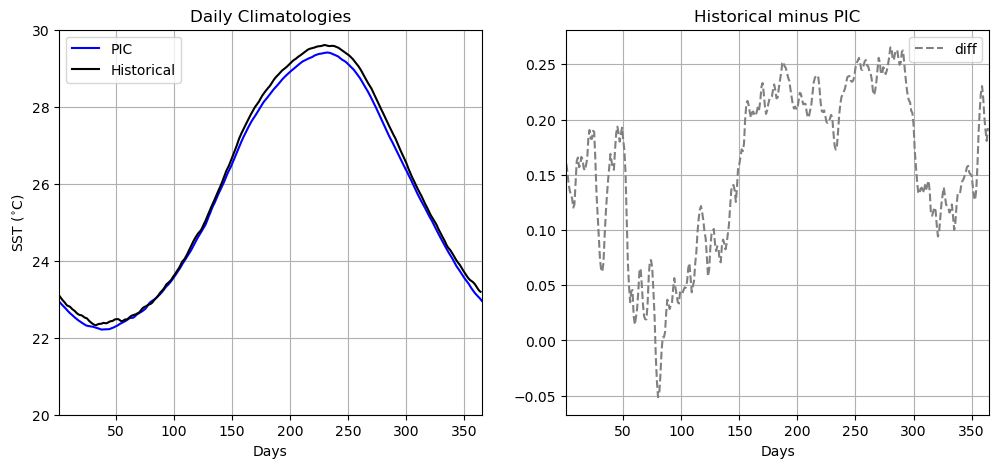

In [115]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))
pic_clim.mean(('yh','xh')).plot(color='blue', label='PIC', ax=ax0)
hist_clim[:-1].mean(('yh','xh')).plot(color='k', label='Historical', ax=ax0)
(hist_clim[:-1]-pic_clim).mean(('yh','xh')).plot(ax=ax1, color='grey', linestyle='dashed', label='diff')
ax0.grid()
ax1.grid()
ax0.set_xlim(1,365)
ax1.set_xlim(1,365)
ax0.set_ylim(20, 30)
ax0.set_ylabel(r'SST ($^{\circ}$C)')
ax0.set_xlabel('Days')
ax0.set_title('Daily Climatologies')
ax1.set_ylabel('')
ax1.set_xlabel('Days')
ax1.set_title('Historical minus PIC')
ax0.legend()
ax1.legend();

In [113]:
# Calculate anomalous SST (variable forcing = (internal variability + variable forcing) - internal variability)
anom = hist_gom.groupby('time') - pic_clim

In [116]:
anom

<xarray.DataArray 'tos' (time: 60225, yh: 23, xh: 40)> Size: 222MB
dask.array<sub, shape=(60225, 23, 40), dtype=float32, chunksize=(1, 23, 40), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 320B -99.75 -99.25 -98.75 ... -81.25 -80.75 -80.25
  * yh       (yh) float64 184B 21.1 21.53 21.96 22.4 ... 29.37 29.81 30.24 30.67
  * time     (time) int64 482kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365

In [ ]:
plt.figure(figsize=(12,5))
anom.mean(('yh','xh')).plot(color='r')
plt.grid()
plt.ylabel(r'SST ($^{\circ}$C)')
plt.xlabel('Time')
plt.title('Daily Anomaly');

### Plot trend line and trend map

KeyboardInterrupt: 

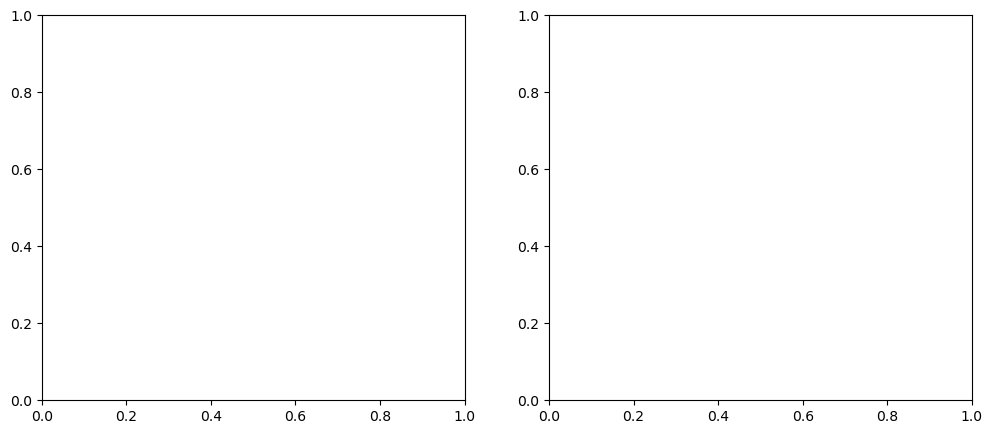

In [21]:
fig, (ax) = plt.subplots(1,2, figsize=(12,5))
sst_feng.sum(['xh', 'yh']).plot(ax=ax[0])
ax[0].grid()
sst_feng.mean(['xh', 'yh']).plot(ax=ax[1])
ax[1].grid();

In [23]:
sst_feng.time

<xarray.DataArray 'time' (time: 11680)> Size: 93kB
array([cftime.DatetimeNoLeap(1983, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1983, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1983, 1, 3, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 12, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 93kB 1983-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds

In [24]:
#go off of spatial avg instead of sum so that we see trend line in regular ˚C, otherwise we're just adding ˚C
trend = linregress(np.arange(0,11680), sst_feng.mean(['xh', 'yh']).fillna(0.))

In [25]:
trend

LinregressResult(slope=7.079724082684583e-05, intercept=26.12317008836351, rvalue=0.09765834476059775, pvalue=3.749281161198154e-26, stderr=6.676392071291453e-06, intercept_stderr=0.045019032778959626)

In [26]:
#linear regression at every grid cell over time, so that we see trend rate in ˚C/yr at each grid pt
# Calculate the linear trend at each grid point
trend = sst_feng.groupby('time.year').mean('time').polyfit('year', deg=1)

In [27]:
trend

<xarray.Dataset> Size: 17kB
Dimensions:               (yh: 31, xh: 33, degree: 2)
Coordinates:
  * yh                    (yh) float64 248B 17.73 18.14 18.56 ... 30.24 30.67
  * xh                    (xh) float64 264B -97.75 -97.25 ... -82.25 -81.75
  * degree                (degree) int64 16B 1 0
Data variables:
    polyfit_coefficients  (degree, yh, xh) float64 16kB dask.array<chunksize=(2, 31, 33), meta=np.ndarray>

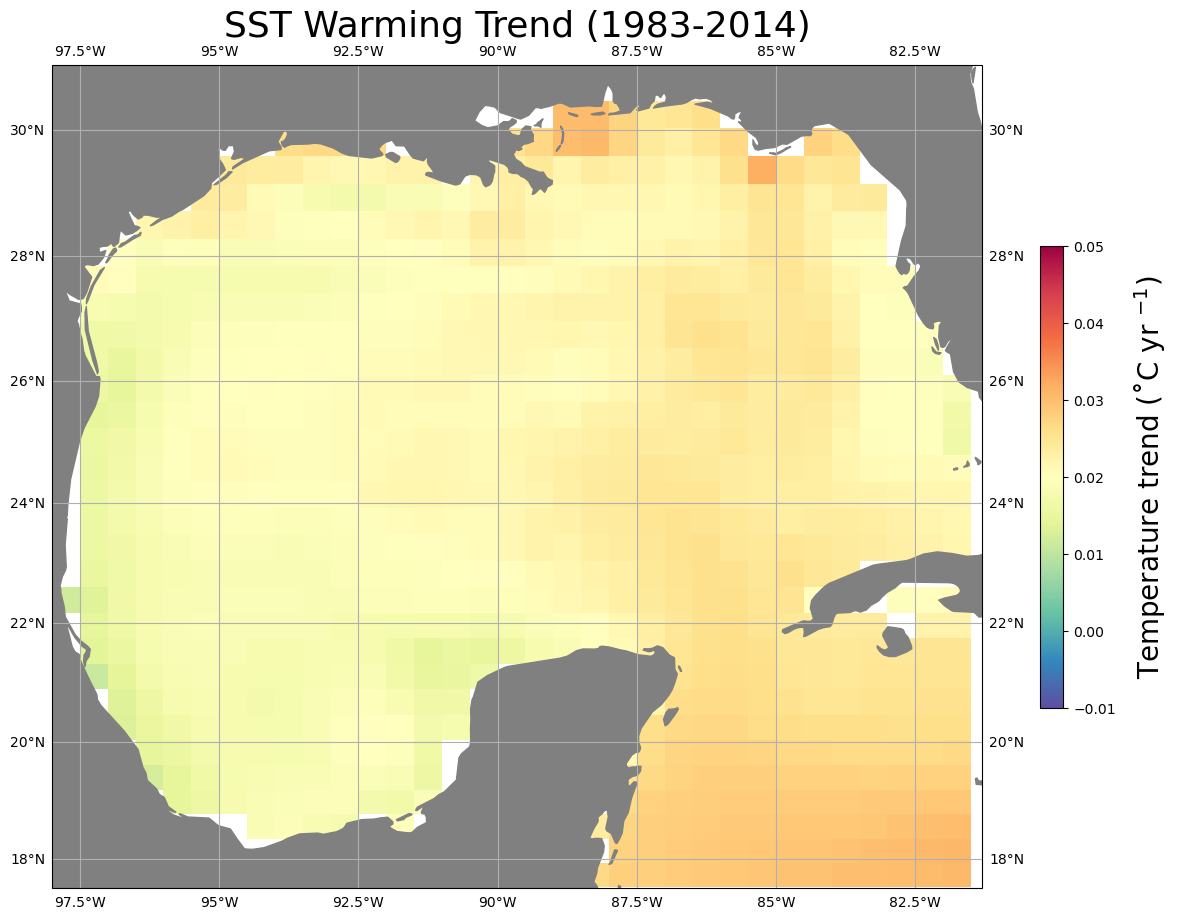

In [30]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81.3, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend.polyfit_coefficients[0]
im = ax.pcolormesh(da.xh, da.yh, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Warming Trend (1983-2014)', fontsize=26);

Similar spatial trend as noted in Feng's results (first line)

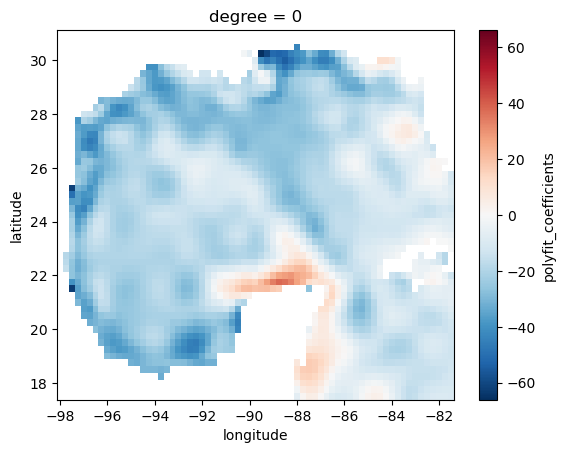

In [14]:
trend.polyfit_coefficients[1].plot()

In [61]:
trend_line = (trend[0]*np.arange(0,341880) + trend[1])

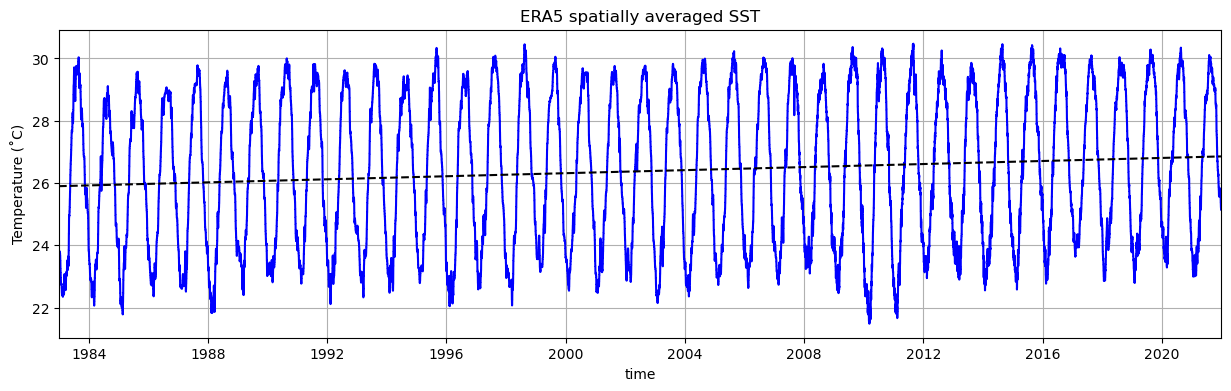

In [64]:
sst_feng.mean(['latitude', 'longitude']).plot(figsize=(15,4), color='blue')
plt.plot(sst_feng.time, trend_line, color='k', linestyle='dashed')
plt.grid()
plt.ylabel('Temperature (˚C)')
plt.xlim(sst_feng.time.sel(time='1983-01-01', method='nearest'), 
         sst_feng.time.sel(time='2021-12-31', method='nearest'))
plt.title('ERA5 spatially averaged SST');

In [68]:
print('Spatially averaged rate of SST increase over 1983-2021:', 
      (trend_line[-1] - trend_line[0]) / (2021-1983), 
      '˚C/yr')

Spatially averaged rate of SST increase over 1983-2021: 0.025146481519222164 ˚C/yr
